In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature
from skimage.metrics import mean_squared_error,peak_signal_noise_ratio,structural_similarity

In [22]:
img_name = "elephant"  #[elephant, cameraman]
img_path = f"imgs/{img_name}.png"
gt_path = f"gt/{img_name}_gt.png"
Result_h_path = "result_elephant/result_npy/Result_h_16.npy"
Result_v_path = "result_elephant/result_npy/Result_v_16.npy"

# Binary Threshold
threshold = 0.001

In [23]:
def show_img(img):
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='binary') 
    plt.show()

In [24]:
def save_img(img, path = "test.png"):
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='binary') 
    plt.savefig(path)
    plt.show()

Read Original and Gt Image

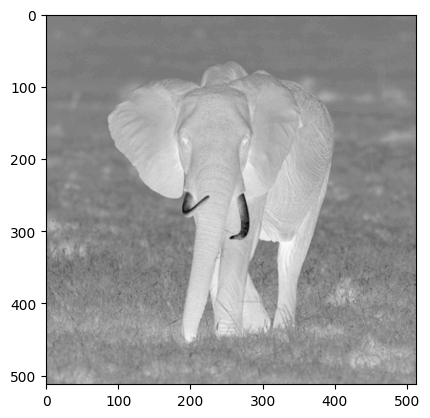

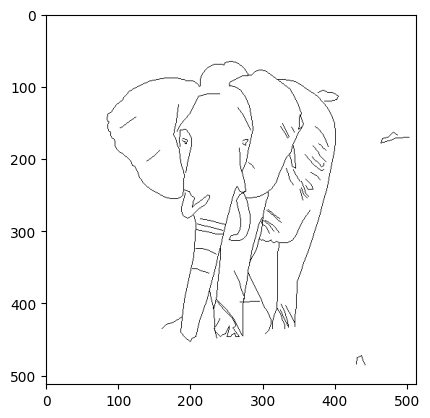

In [25]:
original_img = np.asarray(Image.open(img_path).convert('L'))
scale_original_img = (original_img - np.min(original_img)) / (np.max(original_img) - np.min(original_img))
show_img(scale_original_img)

gt_img = np.asarray(Image.open(gt_path))
scale_gt_img = gt_img / 255.0
show_img(scale_gt_img)

Load Pred Edge 

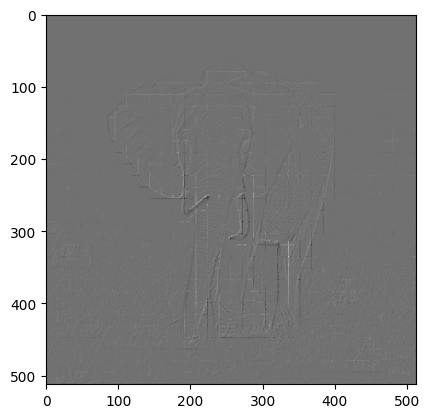

In [26]:
Result_h = np.load(Result_h_path)
Result_v = np.load(Result_v_path)

pred_img = Result_h + Result_v
scale_pred_img = (pred_img - np.min(pred_img)) / (np.max(pred_img) - np.min(pred_img))
show_img(scale_pred_img)

Mask Pred Edge with Binary Threshold

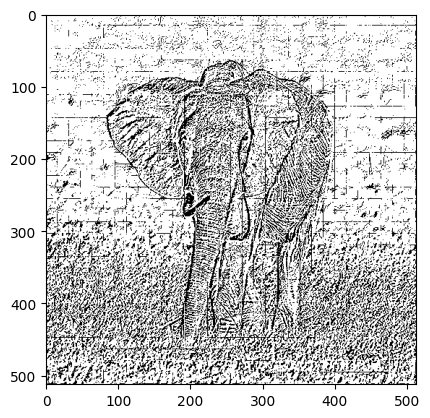

In [27]:
mask_pred_img = np.where(pred_img > threshold, 1.0, 0.0)
show_img(mask_pred_img)

Canny Egde detection

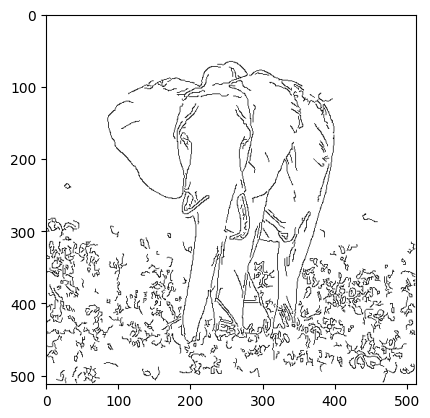

In [28]:
sigma = 1.0 #Default 1.0
canny_img = feature.canny(original_img).astype(float)
show_img(canny_img)

Sober Edge detection

before thres


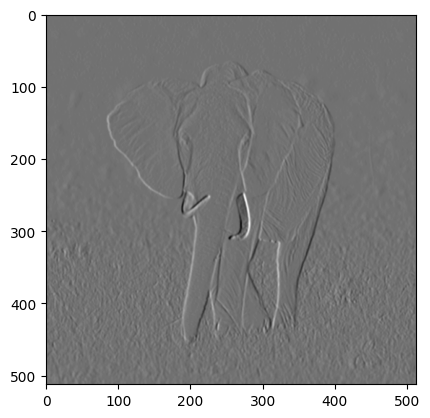

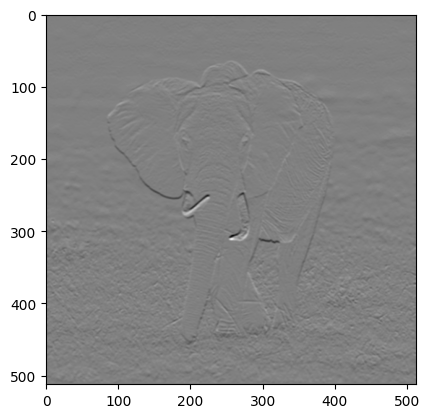

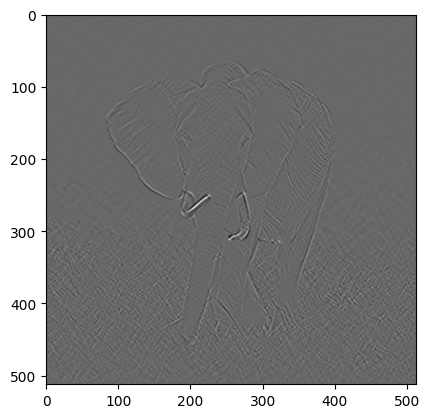

after thres


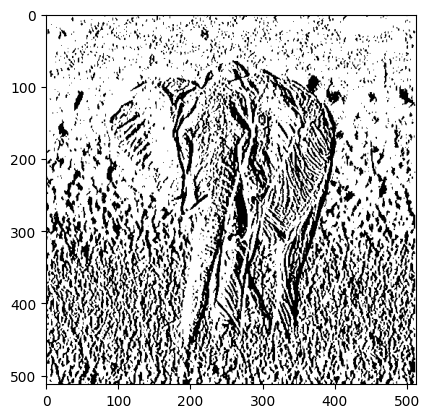

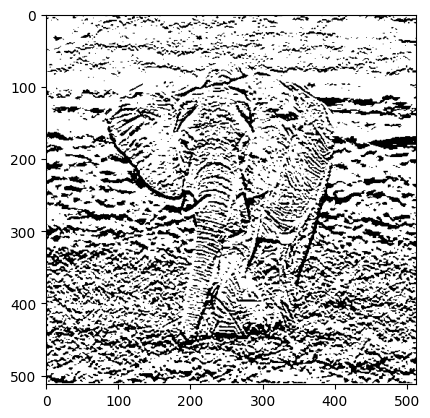

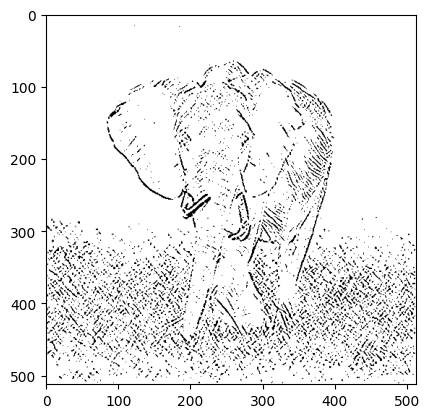

In [42]:
sobelx = cv2.Sobel(src=original_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=original_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=original_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
print("before thres")
show_img(sobelx)
show_img(sobely)
show_img(sobelxy)
print("after thres")
threshold = 100
sobelx_thres = np.where(sobelx > threshold, 1.0, 0.0)
sobely_thres = np.where(sobely > threshold, 1.0, 0.0)
sobelxy_thres = np.where(sobelxy > threshold, 1.0, 0.0)
show_img(sobelx_thres)
show_img(sobely_thres)
show_img(sobelxy_thres)

Metrics for Edge Evaluation

In [29]:
def metrics(I1, I2, name = "No Specify the Name"):
    print(name)
    print(f"MSE: {mean_squared_error(I1, I2)}")   #The smaller the better
    print(f"PSNR: {peak_signal_noise_ratio(I1, I2)}")   #The larger the better
    print(f"SSIM: {structural_similarity(I1, I2, data_range = 1)}")    #The larger the better
    print("\n")
    

In [30]:
metrics(scale_gt_img, scale_original_img, name = "Original Image")
metrics(scale_gt_img, scale_pred_img, name = "Pred Image without mask")
metrics(scale_gt_img, mask_pred_img, name = "Masked Pred Image")
metrics(scale_gt_img, canny_img, name = "Canny Pred Image")

Original Image
MSE: 0.19231803101823858
PSNR: 7.15979996028703
SSIM: 0.002531813637994835


Pred Image without mask
MSE: 0.3058790624574383
PSNR: 5.144502496266447
SSIM: 0.0007050316965271097


Masked Pred Image
MSE: 0.24771881103515625
PSNR: 6.060410131211698
SSIM: 0.0762440841910313


Canny Pred Image
MSE: 0.06296539306640625
PSNR: 12.008980811783342
SSIM: 0.6520774649590793


